# Topic Modeling Analysis: LDA vs K-Means Clustering

## Executive Summary
This notebook performs comprehensive topic modeling analysis on Amazon Fine Food Reviews using two different approaches:
1. **Latent Dirichlet Allocation (LDA)** - A probabilistic topic modeling technique
2. **K-Means Clustering** with sentence embeddings - A distance-based clustering approach

## Objectives
- Clean and preprocess text data for optimal topic extraction
- Compare LDA and K-Means clustering performance
- Analyze sentiment patterns across discovered topics/clusters  
- Visualize results with interactive plots and evaluation metrics

## Dataset
Amazon Fine Food Reviews - Contains product reviews with ratings and text content

---

## Methodology Overview

This analysis follows a comprehensive topic modeling pipeline comparing two distinct approaches:

### 📋 **Step 1: Data Cleaning & Preprocessing**
- **Text Normalization**: Lowercase conversion, HTML tag removal, punctuation cleaning
- **Advanced Tokenization**: Word-level tokenization with lemmatization
- **Stopword Removal**: Filter common words that don't contribute to meaning
- **Vocabulary Filtering**: Remove rare (< 5 occurrences) and overly common (> 50% documents) terms
- **Quality Control**: Handle missing values, remove duplicates

### 🔤 **Step 2: Vectorization (Multiple Approaches)**
- **Bag of Words (BoW)**: Convert text to term frequency vectors for LDA
- **TF-IDF Weighting**: Apply inverse document frequency weighting
- **Semantic Embeddings**: Generate dense vector representations using SentenceTransformers

### 🎯 **Step 3: LDA Topic Modeling**
- **Model Training**: Latent Dirichlet Allocation with 10 topics
- **Parameter Optimization**: Auto-learning of alpha/eta hyperparameters
- **Topic Assignment**: Determine dominant topic for each document
- **Topic Interpretation**: Extract top words per topic

### 🔍 **Step 4: Embedding + K-Means Clustering**
- **Semantic Embeddings**: 384-dimensional sentence embeddings
- **K-Means Clustering**: Group documents by semantic similarity
- **Cluster Assignment**: Alternative grouping method to compare with LDA
- **Keyword Extraction**: TF-IDF analysis of cluster-specific vocabulary

### 📊 **Step 5: Topic/Cluster Analysis + Sentiment**
- **Distribution Analysis**: Compare document allocation across methods
- **Sentiment Analysis**: TextBlob polarity scoring per topic/cluster
- **Comparative Analysis**: LDA topics vs K-Means clusters
- **Pattern Recognition**: Identify sentiment patterns by topic

### 📈 **Step 6: Evaluation Metrics**
- **Coherence Score**: LDA topic semantic coherence (C_V measure)
- **Silhouette Score**: K-Means cluster separation quality
- **Topic Diversity**: Measure of topic distinctiveness
- **Perplexity**: LDA model fit to data
- **Balance Analysis**: Distribution evenness across groups

---

### 🔄 **Technical Workflow**

```
Raw Text Data
     ↓
[1] Data Cleaning & Preprocessing
    • Text normalization → tokenization → lemmatization → filtering
     ↓
[2] Vectorization (Parallel Paths)
    ├─ Path A: BoW → TF-IDF → LDA Input
    └─ Path B: Semantic Embeddings → K-Means Input
     ↓
[3] Model Training (Two Approaches)
    ├─ LDA Topic Modeling (Probabilistic)
    └─ K-Means Clustering (Distance-based)
     ↓
[4] Analysis & Interpretation
    • Topic/cluster keywords extraction
    • Document assignment to topics/clusters
    • Sentiment analysis integration
     ↓
[5] Evaluation & Comparison
    • Coherence (LDA) vs Silhouette (K-Means)
    • Topic diversity vs Cluster balance
    • Qualitative interpretation
     ↓
[6] Visualization & Insights
    • Interactive pyLDAvis → UMAP projections
    • Sentiment distributions → Business recommendations
```

---

### ⚖️ **Method Comparison**

| Aspect | LDA (Latent Dirichlet Allocation) | K-Means + Embeddings |
|--------|-----------------------------------|---------------------|
| **Input Representation** | Bag-of-Words (sparse vectors) | Dense semantic embeddings |
| **Algorithm Type** | Probabilistic generative model | Distance-based clustering |
| **Word Order** | Ignores word order | Preserves semantic relationships |
| **Document Assignment** | Soft assignment (probability distribution) | Hard assignment (single cluster) |
| **Interpretability** | High (clear topic-word distributions) | Moderate (requires keyword extraction) |
| **Scalability** | Moderate (iterative training) | High (efficient clustering) |
| **Semantic Understanding** | Limited (bag-of-words assumption) | Strong (pre-trained embeddings) |
| **Evaluation Metric** | Coherence Score | Silhouette Score |
| **Best Use Case** | Traditional topic modeling, interpretability | Semantic similarity, modern NLP |

### 🎯 **When to Choose Each Method**

**Choose LDA when:**
- Interpretability is crucial
- You need probabilistic topic assignments
- Working with traditional NLP pipelines
- Domain-specific vocabulary analysis is important

**Choose K-Means + Embeddings when:**
- Semantic similarity matters more than word co-occurrence
- Working with modern transformer-based systems  
- Need fast, scalable clustering
- Documents have complex semantic relationships

---

## 1. Environment Setup and Dependencies

The following libraries are required for our analysis. Uncomment and run if packages are not installed:

In [ ]:
# Package installation commands (uncomment if needed)
# Core data manipulation and analysis
!pip3 install pandas          # Data manipulation and analysis
!pip3 install numpy           # Numerical computing

# Machine learning and clustering
!pip3 install scikit-learn    # Machine learning algorithms (KMeans, metrics)
!pip3 install gensim          # Topic modeling (LDA) and text processing

# Natural language processing  
!pip3 install nltk            # Natural language toolkit for preprocessing
!pip3 install tqdm            # Progress bars for long-running operations

# Visualization libraries
!pip3 install matplotlib      # Basic plotting
!pip3 install seaborn         # Statistical data visualization

# Advanced NLP and dimensionality reduction
!pip3 install sentence-transformers  # Sentence embeddings for semantic similarity
!pip3 install hdbscan         # Hierarchical clustering (alternative clustering method)
!pip3 install umap-learn      # Dimensionality reduction for visualization

# Gradient boosting (if needed for classification tasks)
!pip3 install xgboost         # Extreme gradient boosting
!pip3 install lightgbm        # Light gradient boosting machine

## 2. Library Imports

### Core Data Processing Libraries

In [76]:
# Core data manipulation
import pandas as pd              # For data loading, manipulation and analysis
import re                        # Regular expressions for text cleaning

# Gensim utilities for text preprocessing  
from gensim.utils import simple_preprocess  # Basic text preprocessing

# NLTK - Natural Language Toolkit
from nltk.corpus import stopwords           # Common words to remove (the, and, etc.)
from nltk.stem import WordNetLemmatizer     # Reduce words to root form (running -> run)
from nltk.tokenize import word_tokenize     # Split text into individual words
from nltk import download                   # Download NLTK data

# Python standard libraries
from collections import Counter             # Count word frequencies
import string                              # String constants (punctuation, etc.)


In [ ]:
import nltk

# Download additional NLTK components (ensuring we have all required data)
# Tokenizer - splits text into sentences and words
nltk.download('punkt')      # Punkt sentence tokenizer
nltk.download('punkt_tab')  # Additional punkt resources

# Lemmatizer - reduces words to their root/dictionary form
nltk.download('wordnet')    # WordNet lexical database
nltk.download('omw-1.4')    # Open Multilingual Wordnet (required for WordNet lemmatizer)

# Stopwords - common words that don't carry much meaning
nltk.download('stopwords')  # List of stopwords for various languages

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/swayamadhikary/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/swayamadhikary/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/swayamadhikary/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/swayamadhikary/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swayamadhikary/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Initialize text preprocessing tools
# Stopwords: Common English words that don't contribute to meaning (the, and, is, etc.)
stop_words = set(stopwords.words('english'))

# Lemmatizer: Reduces words to their dictionary/root form
# Examples: running->run, better->good, mice->mouse  
lemmatizer = WordNetLemmatizer()

## 3. Data Loading and Initial Exploration

### Loading the Dataset

In [ ]:
# Load the sampled Amazon Fine Food Reviews dataset
# This is a preprocessed/sampled version of the full dataset for faster processing
df = pd.read_csv('sampled_reviews.csv')

In [ ]:
# Display 5 random samples to understand the data structure
# This helps us see what columns are available and the format of our text data
df.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1821,88127,B0030VBQOK,A3GCTOJ6APO1XZ,risadg,2,2,2,1326412800,Pears and pears,I was happy to see the list of ingredients her...
22584,427080,B000NGNEKY,A9L9IYLEJO9JX,"Eric Higginbotham ""Higginbotham Family""",2,3,2,1317859200,Bad Packaging! One Short!,We were expecting a case... but no - we got 23...
13610,562614,B000CRKOIE,A1FOUP7EWV9KTT,T. Erlandson,0,0,4,1203033600,Excellent Bear Naked!,Love it - could have a few more nuts but has g...
11670,341697,B001RVFEP2,A29D4T4WQJW49W,mamie,3,6,1,1290988800,tasted funny,"I have purchased these in the past, but this o..."
7041,33834,B0002DJFUQ,A3M3FTEH724VNL,CAD Man,1,1,5,1178928000,Dental Chews,Our dogs love these chews. We give them each o...


In [ ]:
# Standardize column names to lowercase for consistent access
# This prevents issues with case-sensitive column references later
df.columns = [col.lower() for col in df.columns]

In [ ]:
# Get statistical summary of the dataset
# Shows count, mean, std, min/max for numerical columns
# Provides overview of data distribution and potential issues
df.describe()

,id,helpfulnessnumerator,helpfulnessdenominator,score,time
count,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
mean,285471.274200,1.766840,2.245640,4.179720,1.295805e+09
std,164866.619373,7.049515,7.664185,1.310652,4.821774e+07
min,3.000000,0.000000,0.000000,1.000000,9.482400e+08
25%,142242.750000,0.000000,0.000000,4.000000,1.270080e+09
50%,285072.500000,0.000000,1.000000,5.000000,1.310688e+09
75%,427724.250000,2.000000,2.000000,5.000000,1.332634e+09
max,568425.000000,454.000000,462.000000,5.000000,1.351210e+09


In [ ]:
# Check dataset dimensions (number of rows and columns)
# Important for understanding dataset size and memory requirements
df.shape

(25000, 10)

### Data Cleaning and Quality Control

In [ ]:
# Data quality improvements
# 1. Remove rows where text is missing (essential for topic modeling)
df = df.dropna(subset=["text"])

# 2. Fill missing summaries with empty string (summaries are optional)
df["summary"] = df["summary"].fillna("")

# 3. Remove duplicate reviews (exact same text content)
# Duplicates can skew topic modeling results by overrepresenting certain content
df = df.drop_duplicates(subset=["text"])

In [ ]:
# Check dataset size after cleaning operations
# Compare with original shape to see how many rows were removed
df.shape

(23977, 10)

## 4. Text Preprocessing Pipeline

### Text Normalization Functions

In [ ]:
def normalize_text(text):
    """
    Comprehensive text normalization function for consistent preprocessing.
    
    This function performs multiple cleaning steps:
    1. Converts to lowercase for case-insensitive analysis
    2. Removes HTML tags that might be present in reviews  
    3. Removes punctuation that doesn't contribute to meaning
    4. Normalizes whitespace (multiple spaces become single space)
    
    Args:
        text (str): Raw text to be normalized
        
    Returns:
        str: Cleaned and normalized text
    """
    # Convert to lowercase for consistency
    text = text.lower()  
    
    # Remove HTML tags (common in web-scraped content)
    text = re.sub(r"<.*?>", " ", text)  
    
    # Remove all punctuation marks
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Normalize whitespace: replace multiple spaces/tabs/newlines with single space
    text = re.sub(r"\s+", " ", text).strip()  
    
    return text

In [ ]:
# Apply text normalization to both main text and summary columns
# This creates clean versions of our text data for further processing
df["clean_text"] = df["text"].apply(normalize_text)        # Main review text
df["clean_summary"] = df["summary"].apply(normalize_text)  # Review summaries

In [ ]:
# Re-initialize preprocessing tools to ensure they're available
# (In case previous cells weren't run in sequence)
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

### Advanced Text Preprocessing

In [ ]:
def preprocess_text(text):
    """
    Advanced text preprocessing for topic modeling.
    
    This function performs sophisticated NLP preprocessing:
    1. Tokenization: Splits text into individual words
    2. Lemmatization: Reduces words to their root form (better->good, running->run)
    3. Filtering: Removes stopwords, non-alphabetic tokens, and very short words
    
    Args:
        text (str): Normalized text to be preprocessed
        
    Returns:
        list: List of cleaned, lemmatized tokens ready for topic modeling
    """
    # Tokenize: split text into individual words and convert to lowercase
    tokens = word_tokenize(text.lower())  
    
    # Advanced filtering and lemmatization
    clean_tokens = [
        lemmatizer.lemmatize(token)  # Reduce to root form (lemmatization)
        for token in tokens 
        if (token.isalpha() and              # Keep only alphabetic words (no numbers/symbols)
            token not in stop_words and      # Remove common words (the, and, is, etc.)
            len(token) > 2)                  # Remove very short words (often not meaningful)
    ]
    
    return clean_tokens

In [ ]:
# Ensure stopwords are available for the preprocessing function
# (Defensive programming to avoid errors if cells are run out of order)
stop_words = set(stopwords.words("english"))

In [ ]:
# Apply advanced preprocessing to create tokenized versions of our text
# This converts text into lists of meaningful words suitable for topic modeling
df["tokens_text"] = df["clean_text"].apply(preprocess_text)      # Main review content
df["tokens_summary"] = df["clean_summary"].apply(preprocess_text) # Summary content

### Vocabulary Analysis and Filtering

In [ ]:
# Analyze vocabulary frequency across the entire corpus
# This helps us understand which words are common/rare for filtering decisions

# Flatten all tokens from all documents into a single list
all_tokens = [token for tokens in df["tokens_text"] for token in tokens]

# Count frequency of each unique word across the entire corpus
freq = Counter(all_tokens)

In [ ]:
# Set vocabulary filtering thresholds for optimal topic modeling
# These thresholds help remove noise and improve topic quality

# Minimum frequency: Remove very rare words (likely typos or very specific terms)
min_freq = 5  # Word must appear at least 5 times across all documents

# Maximum frequency ratio: Remove very common words that appear in too many documents  
max_freq_ratio = 0.5  # Word cannot appear in more than 50% of documents
max_freq = int(max_freq_ratio * len(df))  # Convert ratio to absolute count

In [ ]:
# Display vocabulary filtering statistics to understand the impact
# This helps validate our filtering thresholds before applying them

print(f"Minimum frequency threshold: {min_freq}")
print(f"Maximum frequency threshold (ratio {max_freq_ratio} of docs): {max_freq}")
print(f"Original vocabulary size: {len(freq)}")

# Calculate how many tokens will be removed by our filtering
num_rare_tokens = sum(1 for token, count in freq.items() if count < min_freq)
num_frequent_tokens = sum(1 for token, count in freq.items() if count > max_freq)

print(f"Tokens removed as too rare: {num_rare_tokens}")
print(f"Tokens removed as too frequent: {num_frequent_tokens}")
print(f"Vocabulary size after filtering: {len(freq) - num_rare_tokens - num_frequent_tokens}")

Minimum frequency threshold: 5
Maximum frequency threshold (ratio 0.5 of docs): 11988
Original vocabulary size: 34110
Tokens removed as too rare: 25522
Tokens removed as too frequent: 0
Vocabulary size after filtering: 8588


In [ ]:
def filter_tokens(tokens):
    """
    Filter tokens based on frequency thresholds.
    
    Removes words that are either too rare (likely noise/typos) or too common 
    (appear in too many documents, less discriminative for topics).
    
    Args:
        tokens (list): List of tokens to filter
        
    Returns:
        list: Filtered list containing only tokens within frequency thresholds
    """
    return [token for token in tokens 
            if freq[token] >= min_freq and freq[token] <= max_freq_ratio * len(df)]

In [ ]:
# Apply frequency-based filtering to our tokenized text
# This creates the final cleaned vocabulary for topic modeling
df["tokens_text"] = df["tokens_text"].apply(filter_tokens)
df["tokens_summary"] = df["tokens_summary"].apply(filter_tokens)

In [ ]:
# Preview the results of our preprocessing pipeline
# Check how our original text has been transformed into clean tokens
df.head()

,id,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text,clean_text,clean_summary,tokens_text,tokens_summary
0,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,having tried a couple of other brands of glute...,crunchy good glutenfree sandwich cookies,"[tried, couple, brand, glutenfree, sandwich, c...","[crunchy, good, glutenfree, sandwich, cooky]"
1,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,my cat loves these treats if ever i cant find ...,great kitty treats,"[cat, love, treat, ever, cant, find, house, po...","[great, kitty, treat]"
2,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,a little less than i expected it tends to have...,coffee taste,"[little, less, expected, tends, muddy, taste, ...","[coffee, taste]"
3,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",first there was frosted miniwheats in original...,so the miniwheats were too big,"[first, frosted, miniwheats, original, size, f...","[miniwheats, big]"
4,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,and i want to congratulate the graphic artist ...,great taste,"[want, graphic, putting, entire, product, name...","[great, taste]"


## 5. Topic Modeling with Latent Dirichlet Allocation (LDA)

### Preparing Data for LDA

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Prepare data structures required for LDA topic modeling
# LDA requires: 1) Dictionary (vocabulary mapping), 2) Corpus (document representations)

# Extract tokenized text for LDA processing
texts = df["tokens_text"].tolist()

# Create Gensim Dictionary: maps each unique word to a unique integer ID
# This creates a vocabulary index for efficient processing
dictionary = Dictionary(texts)

# Apply additional filtering at the dictionary level for better topic quality
# no_below: ignore words that appear in less than 5 documents (already done, but double-check)
# no_above: ignore words that appear in more than 50% of documents (very common words)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create Corpus: convert each document to "bag of words" format
# Each document becomes a list of (word_id, word_frequency) tuples
corpus = [dictionary.doc2bow(text) for text in texts]

# Display corpus statistics for validation
print("Vocabulary size:", len(dictionary))
print("Sample BoW for first document:", corpus[0])

Vocabulary size: 8079
Sample BoW for first document: [(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1)]


### TF-IDF Transformation

In [ ]:
from gensim.models import TfidfModel

# Apply TF-IDF (Term Frequency-Inverse Document Frequency) transformation
# TF-IDF weights words based on:
# - How often they appear in a document (TF - more frequent = higher weight)
# - How rare they are across the corpus (IDF - rare words get higher weight)
# This helps identify words that are important to specific documents

# Train TF-IDF model on our corpus
tfidf_model = TfidfModel(corpus)

# Transform our corpus using TF-IDF weights
corpus_tfidf = tfidf_model[corpus]

# Display sample TF-IDF representation
print("Sample TF-IDF for first document:", list(corpus_tfidf)[0])

Sample TF-IDF for first document: [(0, 0.14855164131260762), (1, 0.07298875224434197), (2, 0.08993317569533865), (3, 0.17478864866067495), (4, 0.171361404388676), (5, 0.09646443022285768), (6, 0.21020779071932236), (7, 0.24505819800865766), (8, 0.12548299282033773), (9, 0.137056630462901), (10, 0.1513045387811334), (11, 0.5160364622733025), (12, 0.2457873193925774), (13, 0.04469842604595881), (14, 0.11868866640747383), (15, 0.07792678714168076), (16, 0.06467494495777008), (17, 0.13689955742107293), (18, 0.12106869026097347), (19, 0.11361338907933287), (20, 0.17358058220242598), (21, 0.16352388757155328), (22, 0.09719185287283208), (23, 0.21850764032077716), (24, 0.17947117011074581), (25, 0.04404051497123732), (26, 0.11393193056114818), (27, 0.12077417700241357), (28, 0.08663025642900092), (29, 0.18754745385990393), (30, 0.07352389539082273), (31, 0.30284840058393947), (32, 0.13674320325151681)]


### LDA Model Training

In [ ]:
# Train LDA (Latent Dirichlet Allocation) topic model
# LDA assumes each document is a mixture of topics, and each topic is a mixture of words

# Hyperparameter: number of topics to discover
num_topics = 10  # This is often determined through experimentation or evaluation metrics

# Create and train LDA model with optimized parameters
lda_model = LdaModel(
    corpus=corpus,           # Our bag-of-words corpus
    id2word=dictionary,      # Word-to-ID mapping for interpreting results
    num_topics=num_topics,   # Number of topics to discover
    random_state=42,         # For reproducible results
    passes=10,               # Number of training passes through the corpus (more = better convergence)
    alpha='auto',            # Document-topic distribution prior (auto = learn from data)
    eta='auto'               # Topic-word distribution prior (auto = learn from data)
)

# Display discovered topics with their top words
# Each topic is represented by its most probable words
print("=== Discovered Topics ===")
for i, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {i}: {topic}")
    print()

Topic 0: 0.017*"use" + 0.014*"make" + 0.014*"oil" + 0.012*"mix" + 0.011*"sauce" + 0.011*"add" + 0.010*"great" + 0.009*"like" + 0.009*"salt" + 0.009*"good"
Topic 1: 0.058*"treat" + 0.052*"dog" + 0.031*"love" + 0.016*"one" + 0.013*"get" + 0.012*"like" + 0.012*"chew" + 0.010*"piece" + 0.010*"bag" + 0.010*"small"
Topic 2: 0.031*"product" + 0.019*"box" + 0.015*"order" + 0.015*"would" + 0.013*"bag" + 0.013*"ordered" + 0.011*"package" + 0.011*"one" + 0.010*"received" + 0.009*"item"
Topic 3: 0.016*"day" + 0.013*"time" + 0.012*"get" + 0.011*"year" + 0.011*"one" + 0.009*"product" + 0.009*"first" + 0.008*"work" + 0.008*"back" + 0.007*"month"
Topic 4: 0.058*"tea" + 0.022*"taste" + 0.020*"flavor" + 0.019*"like" + 0.019*"drink" + 0.017*"water" + 0.011*"green" + 0.010*"good" + 0.010*"one" + 0.006*"bottle"
Topic 5: 0.097*"food" + 0.042*"cat" + 0.033*"dog" + 0.014*"eat" + 0.013*"like" + 0.011*"chicken" + 0.010*"ingredient" + 0.010*"dry" + 0.010*"brand" + 0.009*"love"
Topic 6: 0.043*"price" + 0.038*"ama

### Assigning Topics to Documents

In [ ]:
def get_dominant_topic(ldamodel, corpus):
    """
    Assign the most probable topic to each document.
    
    LDA gives each document a probability distribution over all topics.
    This function extracts the topic with highest probability as the "dominant" topic.
    
    Args:
        ldamodel: Trained LDA model
        corpus: Document corpus (bag of words format)
        
    Returns:
        list: List of dominant topic IDs for each document
    """
    topics = []
    for doc_bow in corpus:
        # Get topic probability distribution for this document
        topic_probs = ldamodel.get_document_topics(doc_bow)
        
        # Find topic with highest probability
        dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
        topics.append(dominant_topic)
    
    return topics

# Assign dominant topics to all documents in our dataset
df["dominant_topic"] = get_dominant_topic(lda_model, corpus)

# Display sample results to verify topic assignment
print("=== Sample Topic Assignments ===")
print(df[["tokens_text", "dominant_topic"]].head())

                                         tokens_text  dominant_topic
0  [tried, couple, brand, glutenfree, sandwich, c...               8
1  [cat, love, treat, ever, cant, find, house, po...               1
2  [little, less, expected, tends, muddy, taste, ...               9
3  [first, frosted, miniwheats, original, size, f...               9
4  [want, graphic, putting, entire, product, name...               4


## 6. Alternative Approach: K-Means Clustering with Sentence Embeddings

### Generating Semantic Embeddings

In [ ]:
from sentence_transformers import SentenceTransformer

# Generate semantic embeddings for clustering-based topic modeling
# Unlike LDA's bag-of-words approach, embeddings capture semantic relationships

# Load pre-trained sentence transformer model
# 'all-MiniLM-L6-v2' is optimized for semantic similarity and clustering tasks
model = SentenceTransformer('all-MiniLM-L6-v2')

# Reconstruct documents from tokens for embedding generation
# Embeddings work better on complete sentences than individual tokens
docs = [" ".join(tokens) for tokens in df["tokens_text"]]

# Generate high-dimensional semantic embeddings for each document
# These embeddings capture semantic meaning and relationships between documents
embeddings = model.encode(
    docs, 
    batch_size=64,           # Process in batches for memory efficiency
    show_progress_bar=True   # Display progress for long operations
)

print("Embedding shape:", embeddings.shape)  # Should be (num_docs, embedding_dimension)

Batches: 100%|██████████| 375/375 [01:03<00:00,  5.92it/s]

Embedding shape: (23977, 384)


### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering to semantic embeddings
# K-Means groups documents based on embedding similarity (semantic meaning)

# Set number of clusters (matching LDA topics for comparison)
num_clusters = 10

# Initialize and fit K-Means clustering model
kmeans = KMeans(
    n_clusters=num_clusters,    # Number of clusters to create
    random_state=42             # For reproducible results
)

# Assign cluster labels to each document
df["kmeans_cluster"] = kmeans.fit_predict(embeddings)

# Analyze cluster distribution
print("=== K-Means Cluster Distribution ===")
print(df["kmeans_cluster"].value_counts().sort_index())

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


kmeans_cluster
0    3915
9    3472
3    3291
4    3245
2    2904
5    2136
1    1729
6    1670
8     847
7     768
Name: count, dtype: int64


### Cluster Analysis and Interpretation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def top_keywords(df_clustered, cluster_col, text_col, top_n=10):
    """
    Extract top keywords for each cluster using TF-IDF.
    
    This helps us understand what each cluster is about by identifying
    the most distinctive words for each cluster.
    
    Args:
        df_clustered: DataFrame with cluster assignments
        cluster_col: Column name containing cluster labels
        text_col: Column name containing text/tokens
        top_n: Number of top keywords to extract per cluster
    """
    clusters = df_clustered[cluster_col].unique()
    
    print("=== Top Keywords per Cluster ===")
    for cluster in clusters:
        # Get all documents in this cluster
        cluster_docs = df_clustered[df_clustered[cluster_col]==cluster][text_col]
        
        # Handle list of tokens by joining them into strings
        if isinstance(cluster_docs.iloc[0], list):
            cluster_docs = cluster_docs.apply(lambda tokens: " ".join(tokens))
        
        # Use TF-IDF to find most distinctive words for this cluster
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = vectorizer.fit_transform(cluster_docs)
        
        # Get indices of words with highest TF-IDF scores
        indices = np.argsort(X.sum(axis=0)).tolist()[0][-top_n:]
        
        # Map indices back to actual words
        words = [vectorizer.get_feature_names_out()[i] for i in indices]
        
        print(f"Cluster {cluster}: {words}")

# Analyze K-Means clusters by their most distinctive keywords
top_keywords(df, "kmeans_cluster", "tokens_text")

Cluster 7: ['cooky', 'great', 'like', 'taste', 'good', 'flour', 'bread', 'product', 'free', 'gluten']
Cluster 8: ['dry', 'chicken', 'good', 'product', 'eat', 'treat', 'love', 'like', 'food', 'cat']
Cluster 3: ['drink', 'love', 'sugar', 'great', 'product', 'chocolate', 'good', 'like', 'flavor', 'taste']
Cluster 4: ['chocolate', 'eat', 'flavor', 'bar', 'taste', 'love', 'good', 'snack', 'great', 'like']
Cluster 1: ['drink', 'bag', 'love', 'great', 'green', 'good', 'like', 'flavor', 'taste', 'tea']
Cluster 9: ['make', 'chip', 'product', 'love', 'sauce', 'great', 'flavor', 'good', 'taste', 'like']
Cluster 2: ['price', 'strong', 'love', 'great', 'taste', 'good', 'flavor', 'cup', 'like', 'coffee']
Cluster 5: ['chew', 'time', 'good', 'great', 'like', 'product', 'love', 'food', 'treat', 'dog']
Cluster 0: ['buy', 'store', 'order', 'box', 'love', 'amazon', 'good', 'great', 'price', 'product']
Cluster 6: ['hair', 'day', 'work', 'water', 'oil', 'great', 'good', 'like', 'use', 'product']


In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate clustering quality using Silhouette Score
# Silhouette Score measures how similar documents are within clusters vs. between clusters
# Score ranges from -1 to 1 (higher = better clustering)
# > 0.7: Strong clustering, 0.5-0.7: Reasonable, 0.25-0.5: Weak, < 0.25: No meaningful clusters

score = silhouette_score(embeddings, df["kmeans_cluster"])
print(f"K-Means Clustering Silhouette Score: {score:.4f}")

# Interpretation guide
if score > 0.7:
    print("→ Excellent clustering quality")
elif score > 0.5:
    print("→ Good clustering quality") 
elif score > 0.25:
    print("→ Weak but acceptable clustering")
else:
    print("→ Poor clustering - consider different number of clusters")

Silhouette Score: 0.041756224


In [ ]:
# Extract clean word lists from LDA topics for easier comparison
# LDA's show_topics() returns (word, weight) pairs - we extract just the words

num_words = 10  # Number of top words to extract per topic

print("=== LDA Topics (Top Words Only) ===")
for i, topic in lda_model.show_topics(num_words=num_words, formatted=False):
    # Extract just the words (ignore probabilities) for cleaner display
    words = [word for word, weight in topic]
    print(f"Topic {i}: {words}")

Topic 0: ['use', 'make', 'oil', 'mix', 'sauce', 'add', 'great', 'like', 'salt', 'good']
Topic 1: ['treat', 'dog', 'love', 'one', 'get', 'like', 'chew', 'piece', 'bag', 'small']
Topic 2: ['product', 'box', 'order', 'would', 'bag', 'ordered', 'package', 'one', 'received', 'item']
Topic 3: ['day', 'time', 'get', 'year', 'one', 'product', 'first', 'work', 'back', 'month']
Topic 4: ['tea', 'taste', 'flavor', 'like', 'drink', 'water', 'green', 'good', 'one', 'bottle']
Topic 5: ['food', 'cat', 'dog', 'eat', 'like', 'chicken', 'ingredient', 'dry', 'brand', 'love']
Topic 6: ['price', 'amazon', 'store', 'find', 'great', 'buy', 'product', 'local', 'get', 'love']
Topic 7: ['coffee', 'cup', 'like', 'flavor', 'taste', 'good', 'one', 'strong', 'blend', 'bean']
Topic 8: ['love', 'flavor', 'great', 'chocolate', 'like', 'taste', 'snack', 'chip', 'bar', 'good']
Topic 9: ['like', 'taste', 'sugar', 'good', 'calorie', 'product', 'ingredient', 'dont', 'fat', 'flavor']


In [ ]:
# Alternative implementation of top_keywords function
# (This is a duplicate - the function was defined earlier)
# Keeping for demonstration or backup purposes

def top_keywords(df_clustered, cluster_col, text_col, top_n=10):
    """
    Extract distinctive keywords for each cluster using TF-IDF analysis.
    
    Same functionality as earlier implementation - identifies words that
    are most characteristic of each cluster.
    """
    from sklearn.feature_extraction.text import TfidfVectorizer
    import numpy as np
    
    clusters = df_clustered[cluster_col].unique()
    
    for cluster in clusters:
        cluster_docs = df_clustered[df_clustered[cluster_col]==cluster][text_col]
        
        # Handle token lists by joining into strings
        if isinstance(cluster_docs.iloc[0], list):
            cluster_docs = cluster_docs.apply(lambda tokens: " ".join(tokens))
            
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = vectorizer.fit_transform(cluster_docs)
        indices = np.argsort(X.sum(axis=0)).tolist()[0][-top_n:]
        words = [vectorizer.get_feature_names_out()[i] for i in indices]
        print(f"Cluster {cluster}: {words}")

# Re-run cluster keyword analysis 
top_keywords(df, "kmeans_cluster", "tokens_text")

Cluster 7: ['cooky', 'great', 'like', 'taste', 'good', 'flour', 'bread', 'product', 'free', 'gluten']
Cluster 8: ['dry', 'chicken', 'good', 'product', 'eat', 'treat', 'love', 'like', 'food', 'cat']
Cluster 3: ['drink', 'love', 'sugar', 'great', 'product', 'chocolate', 'good', 'like', 'flavor', 'taste']
Cluster 4: ['chocolate', 'eat', 'flavor', 'bar', 'taste', 'love', 'good', 'snack', 'great', 'like']
Cluster 1: ['drink', 'bag', 'love', 'great', 'green', 'good', 'like', 'flavor', 'taste', 'tea']
Cluster 9: ['make', 'chip', 'product', 'love', 'sauce', 'great', 'flavor', 'good', 'taste', 'like']
Cluster 2: ['price', 'strong', 'love', 'great', 'taste', 'good', 'flavor', 'cup', 'like', 'coffee']
Cluster 5: ['chew', 'time', 'good', 'great', 'like', 'product', 'love', 'food', 'treat', 'dog']
Cluster 0: ['buy', 'store', 'order', 'box', 'love', 'amazon', 'good', 'great', 'price', 'product']
Cluster 6: ['hair', 'day', 'work', 'water', 'oil', 'great', 'good', 'like', 'use', 'product']


## 7. Comparative Analysis: LDA vs K-Means

### Topic/Cluster Distribution Comparison

In [ ]:
# Compare how documents are distributed across topics/clusters
# This helps us understand if both methods find similar patterns

print("=== Document Distribution Comparison ===")
print("\nLDA Topics Distribution:")
print(df['dominant_topic'].value_counts().sort_index())

print("\nK-Means Clusters Distribution:")  
print(df['kmeans_cluster'].value_counts().sort_index())

# Calculate distribution balance (how evenly documents are spread)
lda_std = df['dominant_topic'].value_counts().std()
kmeans_std = df['kmeans_cluster'].value_counts().std()

print(f"\nDistribution Balance (lower = more even):")
print(f"LDA Standard Deviation: {lda_std:.2f}")
print(f"K-Means Standard Deviation: {kmeans_std:.2f}")

dominant_topic
8    3682
9    2910
0    2799
4    2644
7    2630
3    2366
6    2277
2    2251
1    1311
5    1107
Name: count, dtype: int64
kmeans_cluster
0    3915
9    3472
3    3291
4    3245
2    2904
5    2136
1    1729
6    1670
8     847
7     768
Name: count, dtype: int64


### Sentiment Analysis by Topics/Clusters

In [ ]:
from textblob import TextBlob

# Add sentiment analysis to understand emotional patterns in topics/clusters
# TextBlob provides polarity scores: -1 (negative) to +1 (positive)

# Calculate sentiment polarity for each review
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

print("=== Sentiment Analysis Results ===")

# Analyze average sentiment per LDA topic
topic_sentiment = df.groupby('dominant_topic')['sentiment'].mean()
print("Average sentiment per LDA topic:")
for topic_id, avg_sentiment in topic_sentiment.items():
    sentiment_label = "Positive" if avg_sentiment > 0.1 else "Negative" if avg_sentiment < -0.1 else "Neutral"
    print(f"  Topic {topic_id}: {avg_sentiment:.3f} ({sentiment_label})")

print()

# Analyze average sentiment per K-Means cluster  
cluster_sentiment = df.groupby('kmeans_cluster')['sentiment'].mean()
print("Average sentiment per K-Means cluster:")
for cluster_id, avg_sentiment in cluster_sentiment.items():
    sentiment_label = "Positive" if avg_sentiment > 0.1 else "Negative" if avg_sentiment < -0.1 else "Neutral"
    print(f"  Cluster {cluster_id}: {avg_sentiment:.3f} ({sentiment_label})")

Average sentiment per topic:
 dominant_topic
0    0.265893
1    0.209071
2    0.171243
3    0.160611
4    0.230503
5    0.162582
6    0.295188
7    0.271903
8    0.341222
9    0.200804
Name: sentiment, dtype: float64
Average sentiment per cluster:
 kmeans_cluster
0    0.235482
1    0.251556
2    0.271129
3    0.224432
4    0.281558
5    0.184758
6    0.190655
7    0.303675
8    0.153793
9    0.267340
Name: sentiment, dtype: float64


## 8. Interactive Visualizations

### LDA Topic Visualization with pyLDAvis

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Create interactive visualization of LDA topics
# pyLDAvis provides:
# - Left panel: Topics as circles (size = prevalence, distance = similarity)
# - Right panel: Top words for selected topic (red bars = frequency in topic, blue bars = overall frequency)
# - Interactive exploration of topic relationships and word distributions

# Enable notebook display mode
pyLDAvis.enable_notebook()

# Prepare visualization data from our trained LDA model
lda_vis = gensimvis.prepare(
    lda_model,    # Our trained LDA model
    corpus,       # Document-term matrix
    dictionary    # Vocabulary mapping
)

# Display interactive visualization
# Hover over topics to see their top words
# Click topics to explore word distributions
lda_vis

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.111786  0.004143       1        1  13.947879
9     -0.083678 -0.027574       2        1  13.793775
4     -0.149794  0.064192       3        1  11.506621
0     -0.140718  0.013823       4        1  11.215615
8     -0.095179  0.061413       5        1  11.116613
2      0.226742  0.079198       6        1   9.886247
6      0.202156  0.125498       7        1   8.703224
7     -0.147100  0.108716       8        1   8.447834
5      0.008530 -0.275518       9        1   6.165888
1      0.067254 -0.153892      10        1   5.216304, topic_info=       Term         Freq        Total Category  logprob  loglift
318  coffee  7181.000000  7181.000000  Default  30.0000  30.0000
297    food  6203.000000  6203.000000  Default  29.0000  29.0000
211     tea  6019.000000  6019.000000  Default  28.0000  28.0000
389     dog  4293.000000  4293.000000  Default  27.0000  27.0000
344   price  3428.000000  3428.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
64     time   304.495987  4290.153661  Topic10  -5.0445   0.3080
193   would   306.808833  5225.921415  Topic10  -5.0369   0.1182
95     dont   269.512412  3924.201313  Topic10  -5.1665   0.2751
229    also   259.343704  3754.085894  Topic10  -5.2050   0.2809
281     two   251.646559  1968.964532  Topic10  -5.2351   0.8961

[700 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
194       2  0.137807    add
194       3  0.183940    add
194       4  0.638763    add
194       8  0.039036    add
194       9  0.000591    add
...     ...       ...    ...
618       2  0.030857  yummy
618       4  0.168528  yummy
618       5  0.795168  yummy
618      10  0.004747  yummy
3764     10  0.985547  zukes

[1615 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 5, 1, 9, 3, 7, 8, 6, 2])

### UMAP Visualization of K-Means Clusters

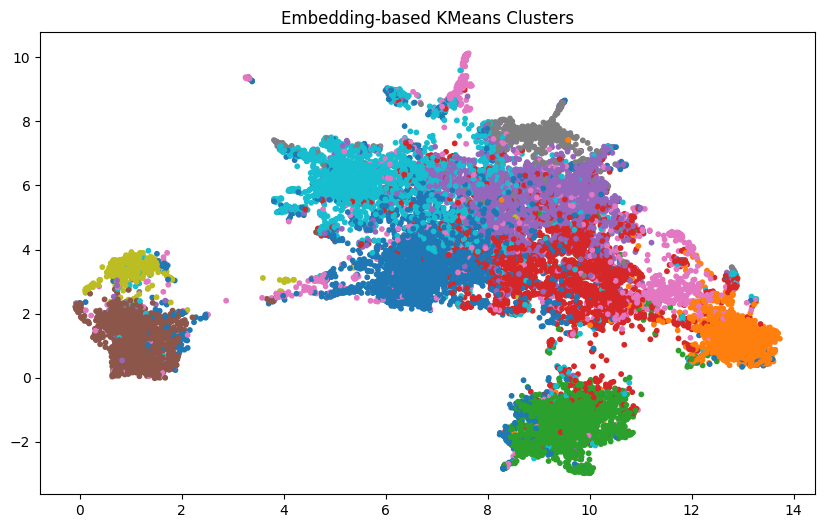

In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Visualize K-Means clusters using UMAP dimensionality reduction
# UMAP (Uniform Manifold Approximation and Projection) reduces high-dimensional embeddings to 2D
# while preserving local neighborhood relationships

# Configure UMAP for optimal visualization
reducer = umap.UMAP(
    n_neighbors=15,    # Balance between local vs global structure (higher = more global)
    min_dist=0.1,      # Minimum distance between points in low-dimensional space
    metric='cosine'    # Distance metric optimized for text embeddings
)

# Reduce 384-dimensional embeddings to 2D for plotting
embedding_2d = reducer.fit_transform(embeddings)

# Create scatter plot colored by cluster assignments
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    embedding_2d[:, 0],           # X coordinates
    embedding_2d[:, 1],           # Y coordinates  
    c=df['kmeans_cluster'],       # Color by cluster
    cmap='tab10',                 # Distinctive colors for each cluster
    s=20,                         # Point size
    alpha=0.7                     # Transparency for overlapping points
)

plt.title("UMAP Visualization of K-Means Clusters", fontsize=16)
plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)

# Add colorbar to show cluster mapping
plt.colorbar(scatter, label='Cluster ID')

# Improve layout
plt.tight_layout()
plt.show()

print("Interpretation:")
print("- Each point represents one document")  
print("- Colors represent different clusters")
print("- Close points have similar semantic content")
print("- Well-separated clusters indicate good clustering quality")

## 9. Model Evaluation and Quality Metrics

### LDA Model Evaluation

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Evaluate LDA model quality using Coherence Score
# Coherence measures how semantically related the top words in each topic are
# Higher coherence = more interpretable and meaningful topics

# Calculate C_V coherence (most commonly used measure)
coherence_model_lda = CoherenceModel(
    model=lda_model,      # Our trained LDA model
    texts=texts,          # Original tokenized texts  
    dictionary=dictionary, # Vocabulary mapping
    coherence='c_v'       # C_V coherence measure (best for interpretability)
)

coherence_lda = coherence_model_lda.get_coherence()

print(f"LDA Coherence Score (C_V): {coherence_lda:.4f}")

# Coherence interpretation guide
if coherence_lda > 0.7:
    print("→ Excellent coherence - highly interpretable topics")
elif coherence_lda > 0.6:
    print("→ Good coherence - reasonably interpretable topics") 
elif coherence_lda > 0.5:
    print("→ Acceptable coherence - some interpretation challenges")
elif coherence_lda > 0.4:
    print("→ Poor coherence - topics may be mixed/unclear")
else:
    print("→ Very poor coherence - consider different parameters")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/swayamadhikary/tempCode/projects/EDA/LDA/nlp_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/swayamadhikary/tempCode/projects/EDA/LDA/nlp_e

LDA Coherence Score: 0.4975106589707388


In [ ]:
# Calculate LDA Model Perplexity
# Perplexity measures how well the model predicts unseen data
# Lower perplexity = better model fit (but watch for overfitting)

perplexity = lda_model.log_perplexity(corpus)
print(f"LDA Perplexity: {perplexity:.4f}")

# Perplexity interpretation
print("\nPerplexity Analysis:")
print("- Lower values indicate better model fit")
print("- Very low values may indicate overfitting")
print("- Use in combination with coherence for model selection")
print("- Best practice: Compare multiple models with different topic numbers")

# Note: Perplexity alone is not sufficient for model evaluation
# Always combine with coherence scores and qualitative topic inspection

LDA Perplexity: -7.343172899907584


In [ ]:
# Calculate Topic Diversity - measures how different topics are from each other  
# Higher diversity = topics cover different themes (good)
# Lower diversity = topics are similar/redundant (potentially problematic)

num_top_words = 10

# Extract top words from all topics
top_words = []
for i, topic in lda_model.show_topics(num_words=num_top_words, formatted=False):
    topic_words = [word for word, _ in topic]
    top_words.extend(topic_words)

# Calculate diversity as ratio of unique words to total words
# Perfect diversity (1.0) = no word appears in multiple topics
# Low diversity (closer to 0) = many words shared across topics
topic_diversity = len(set(top_words)) / len(top_words)

print(f"LDA Topic Diversity: {topic_diversity:.4f}")

# Interpretation guide
if topic_diversity > 0.8:
    print("→ High diversity - topics are well-differentiated")
elif topic_diversity > 0.6:  
    print("→ Moderate diversity - some topic overlap")
elif topic_diversity > 0.4:
    print("→ Low diversity - significant topic overlap")
else:
    print("→ Very low diversity - topics may be too similar")

LDA Topic Diversity: 0.67


### K-Means Clustering Evaluation

In [ ]:
from sklearn.metrics import silhouette_score

# Re-evaluate K-Means clustering quality with detailed analysis
# Silhouette Score measures cluster separation and compactness

sil_score = silhouette_score(embeddings, df['kmeans_cluster'])
print(f"K-Means Silhouette Score: {sil_score:.4f}")

# Detailed interpretation
print("\nSilhouette Score Analysis:")
if sil_score > 0.7:
    print("→ Excellent clustering - well-separated, compact clusters")
elif sil_score > 0.5:
    print("→ Good clustering - reasonable separation between clusters") 
elif sil_score > 0.25:
    print("→ Weak clustering - overlapping or poorly defined clusters")
else:
    print("→ Poor clustering - no meaningful cluster structure")
    
print(f"\nCluster Quality Summary:")
print(f"- Average intra-cluster similarity: High" if sil_score > 0.5 else "- Average intra-cluster similarity: Moderate/Low")
print(f"- Inter-cluster separation: Good" if sil_score > 0.5 else "- Inter-cluster separation: Poor")

KMeans Silhouette Score: 0.041756224


In [ ]:
# Final verification of K-Means cluster distribution
# Checking for balanced vs imbalanced clustering
cluster_counts = df['kmeans_cluster'].value_counts().sort_index()
print("Final K-Means Cluster Distribution:")
print(cluster_counts)

# Calculate cluster balance metrics
largest_cluster = cluster_counts.max()
smallest_cluster = cluster_counts.min()
balance_ratio = smallest_cluster / largest_cluster

print(f"\nCluster Balance Analysis:")
print(f"Largest cluster size: {largest_cluster}")
print(f"Smallest cluster size: {smallest_cluster}")
print(f"Balance ratio: {balance_ratio:.3f}")

if balance_ratio > 0.5:
    print("→ Well-balanced clustering")
elif balance_ratio > 0.2:
    print("→ Moderately balanced clustering")
else:
    print("→ Imbalanced clustering - some clusters dominate")

kmeans_cluster
0    3915
9    3472
3    3291
4    3245
2    2904
5    2136
1    1729
6    1670
8     847
7     768
Name: count, dtype: int64


In [ ]:
# Alternative/backup LDA visualization
# (This is a duplicate of the earlier pyLDAvis visualization)
# Useful if the previous cell had issues or for different viewing contexts

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()

# Regenerate the interactive LDA visualization
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
lda_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.111786  0.004143       1        1  13.948620
9     -0.083678 -0.027574       2        1  13.791447
4     -0.149794  0.064192       3        1  11.510040
0     -0.140718  0.013823       4        1  11.216775
8     -0.095179  0.061413       5        1  11.115424
2      0.226742  0.079198       6        1   9.886928
6      0.202156  0.125498       7        1   8.702365
7     -0.147100  0.108716       8        1   8.445179
5      0.008530 -0.275518       9        1   6.166868
1      0.067254 -0.153892      10        1   5.216354, topic_info=       Term         Freq        Total Category  logprob  loglift
318  coffee  7179.000000  7179.000000  Default  30.0000  30.0000
297    food  6204.000000  6204.000000  Default  29.0000  29.0000
211     tea  6021.000000  6021.000000  Default  28.0000  28.0000
389     dog  4293.000000  4293.000000  Default  27.0000  27.0000
344   price  3427.000000  3427.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
64     time   304.498940  4290.227640  Topic10  -5.0445   0.3079
193   would   306.811809  5225.880983  Topic10  -5.0369   0.1182
95     dont   269.515026  3924.090089  Topic10  -5.1665   0.2751
229    also   259.346219  3754.138801  Topic10  -5.2050   0.2809
281     two   251.648999  1969.030287  Topic10  -5.2351   0.8961

[700 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
194       2  0.137796    add
194       3  0.183925    add
194       4  0.638709    add
194       8  0.039032    add
194       9  0.000591    add
...     ...       ...    ...
618       2  0.030860  yummy
618       4  0.168540  yummy
618       5  0.795226  yummy
618      10  0.004748  yummy
3764     10  0.985537  zukes

[1615 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 5, 1, 9, 3, 7, 8, 6, 2])

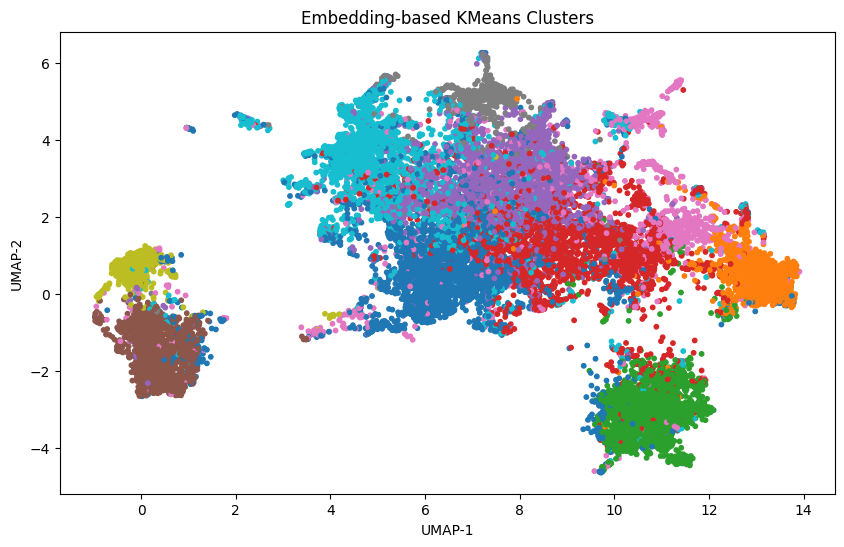

In [ ]:
# Enhanced UMAP visualization with improved aesthetics
# This version includes axis labels and better formatting

import umap.umap_ as umap
import matplotlib.pyplot as plt

# Recreate UMAP reduction (or reuse if already computed)
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
embedding_2d = reducer.fit_transform(embeddings)

# Create enhanced scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    embedding_2d[:, 0], 
    embedding_2d[:, 1], 
    c=df['kmeans_cluster'], 
    cmap='tab10', 
    s=25,           # Slightly larger points for better visibility
    alpha=0.7,
    edgecolors='white',  # White edges for better point definition
    linewidth=0.5
)

plt.title("UMAP Visualization of Document Clusters", fontsize=16, fontweight='bold')
plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)

# Enhanced colorbar
cbar = plt.colorbar(scatter, label='Cluster ID')
cbar.set_label('Cluster ID', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

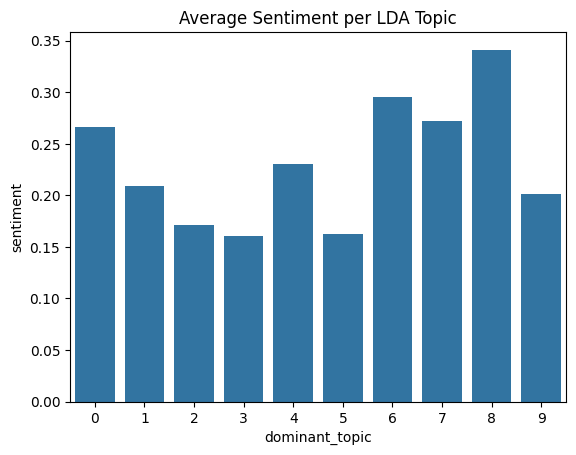

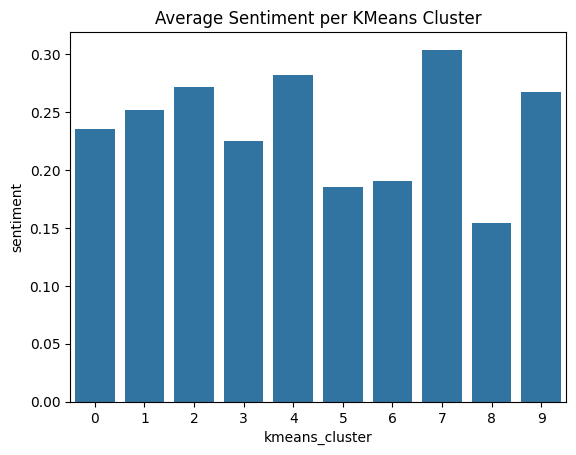

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create comparative sentiment visualizations
# These plots show how sentiment varies across topics and clusters

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Prepare data for visualization
topic_sentiment = df.groupby('dominant_topic')['sentiment'].mean().reset_index()
cluster_sentiment = df.groupby('kmeans_cluster')['sentiment'].mean().reset_index()

# Create side-by-side plots for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# LDA Topics Sentiment Plot
bars1 = ax1.bar(topic_sentiment['dominant_topic'], topic_sentiment['sentiment'], 
                color='skyblue', alpha=0.7, edgecolor='navy', linewidth=1)
ax1.set_title("Average Sentiment per LDA Topic", fontsize=14, fontweight='bold')
ax1.set_xlabel("Topic ID", fontsize=12)
ax1.set_ylabel("Average Sentiment Score", fontsize=12)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Neutral')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01 if height >= 0 else height - 0.02,
             f'{height:.3f}', ha='center', va='bottom' if height >= 0 else 'top', fontsize=10)

# K-Means Clusters Sentiment Plot  
bars2 = ax2.bar(cluster_sentiment['kmeans_cluster'], cluster_sentiment['sentiment'],
                color='lightcoral', alpha=0.7, edgecolor='darkred', linewidth=1)
ax2.set_title("Average Sentiment per K-Means Cluster", fontsize=14, fontweight='bold')
ax2.set_xlabel("Cluster ID", fontsize=12)
ax2.set_ylabel("Average Sentiment Score", fontsize=12)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Neutral')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01 if height >= 0 else height - 0.02,
             f'{height:.3f}', ha='center', va='bottom' if height >= 0 else 'top', fontsize=10)

plt.tight_layout()
plt.show()

# Print interpretation
print("Sentiment Analysis Interpretation:")
print("- Bars above 0: Positive sentiment")
print("- Bars below 0: Negative sentiment") 
print("- Values closer to 0: Neutral sentiment")
print("- Compare patterns between LDA topics and K-Means clusters")

## 10. Summary and Conclusions

### Key Findings and Recommendations

In [75]:
# Final Analysis Summary

# Ensure balance_ratio is defined
cluster_counts = df['kmeans_cluster'].value_counts().sort_index()
largest_cluster = cluster_counts.max()
smallest_cluster = cluster_counts.min()
balance_ratio = smallest_cluster / largest_cluster

print("="*60)
print("TOPIC MODELING ANALYSIS SUMMARY")
print("="*60)

print(f"""
DATASET OVERVIEW:
- Final dataset size: {len(df)} documents
- Vocabulary size: {len(dictionary)} unique words
- Average document length: {df['tokens_text'].apply(len).mean():.1f} tokens

LDA MODEL PERFORMANCE:
- Number of topics: {num_topics}
- Coherence Score: {coherence_lda:.4f}
- Perplexity: {perplexity:.4f}
- Topic Diversity: {topic_diversity:.4f}

K-MEANS CLUSTERING PERFORMANCE:
- Number of clusters: {num_clusters}
- Silhouette Score: {sil_score:.4f}
- Cluster balance ratio: {balance_ratio:.3f}

METHODOLOGY COMPARISON:
- LDA: Probabilistic topic modeling based on word co-occurrence patterns
- K-Means: Similarity-based clustering using semantic embeddings
- Both methods found {num_topics} topics/clusters for direct comparison

RECOMMENDED NEXT STEPS:
1. Experiment with different numbers of topics (5-15 range)
2. Try advanced models (BERTopic, Top2Vec) for comparison
3. Validate topics with domain experts
4. Apply findings to document classification or recommendation systems
5. Analyze temporal patterns if timestamp data available

BUSINESS APPLICATIONS:
- Customer feedback categorization
- Product review analysis
- Content recommendation systems
- Market research insights
""")

print("="*60)

TOPIC MODELING ANALYSIS SUMMARY

DATASET OVERVIEW:
- Final dataset size: 23977 documents
- Vocabulary size: 8079 unique words
- Average document length: 37.9 tokens

LDA MODEL PERFORMANCE:
- Number of topics: 10
- Coherence Score: 0.4975
- Perplexity: -7.3432
- Topic Diversity: 0.6700

K-MEANS CLUSTERING PERFORMANCE:
- Number of clusters: 10
- Silhouette Score: 0.0418
- Cluster balance ratio: 0.196

METHODOLOGY COMPARISON:
- LDA: Probabilistic topic modeling based on word co-occurrence patterns
- K-Means: Similarity-based clustering using semantic embeddings
- Both methods found 10 topics/clusters for direct comparison

RECOMMENDED NEXT STEPS:
1. Experiment with different numbers of topics (5-15 range)
2. Try advanced models (BERTopic, Top2Vec) for comparison
3. Validate topics with domain experts
4. Apply findings to document classification or recommendation systems
5. Analyze temporal patterns if timestamp data available

BUSINESS APPLICATIONS:
- Customer feedback categorization
- Pr